In [ ]:
# # Data is with oversampling and PCA 28 and without renal

In [2]:
#from tqdm import tqdm

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt


import seaborn as sns
sns.set(font_scale=1.5)
import scikitplot as skplt
import pydotplus


from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))


from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor  

import warnings
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz


plt.rc("figure", figsize=(9, 7))

warnings.simplefilter('ignore')

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

pd.set_option('display.max_columns', 500)   # to display 500 columns
pd.set_option('display.max_rows', 500)      # to display 500 rows

import time
from datetime import datetime

from sklearn.svm import SVC

import joblib
import pickle

### Uploading X_train, X_test, y_train, y_test to run the models

In [3]:
X_train_pca = pd.read_csv('X_train_pca.csv') #, header=False, inferSchema=True)
del X_train_pca['Unnamed: 0']

print(X_train_pca.shape)
X_train_pca.head(2)

(567470, 28)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28
0,4.939000,-2.285240,-0.226003,-0.893238,0.570906,-1.876132,-0.198704,-1.056337,0.122633,0.138341,0.081095,0.747890,0.276735,0.395943,-1.814234,0.190413,-0.075387,0.126942,1.366568,-2.073680,-1.007254,1.740771,0.776393,-1.421639,1.309997,-1.467296,-1.357262,-1.080451
1,-2.211324,0.625913,-0.191265,2.004928,0.813503,-0.490319,-0.483132,-0.333660,0.202782,-1.337767,0.115447,0.188925,-0.142400,0.039871,0.190795,-0.014646,0.225228,0.100106,0.124809,0.011146,-0.195059,-0.024842,-0.588223,-0.124320,0.526355,0.204535,-0.387743,0.836611


In [4]:
y_train = pd.read_csv('y_train.csv') #, header=False, inferSchema=True)
del y_train['Unnamed: 0']

print(y_train.shape)
y_train.head(2)

(567470, 1)


,READMIT30_FLAG
0,1
1,0


In [5]:
X_test_pca = pd.read_csv('X_test_pca.csv') #, header=False, inferSchema=True)
del X_test_pca['Unnamed: 0']

print(X_test_pca.shape)
X_test_pca.head(2)

(91666, 28)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28
0,0.266405,-2.320376,-0.254529,-0.870744,1.730796,-1.359119,-1.223540,1.448140,-0.499162,2.447571,-1.158411,1.168743,-0.420795,1.562761,0.446293,2.289175,0.682446,-0.917974,0.725556,1.914849,-1.875034,-0.988337,-1.418500,0.330088,-1.302126,0.097015,-0.698175,-0.020436
1,0.093984,-2.342466,-0.200600,-0.921045,-0.614796,3.828973,-3.547334,-0.263895,-0.041280,0.148822,-0.607676,-0.332174,-0.698037,-1.117567,0.510710,0.153611,-0.016309,-0.133714,-0.614300,-0.033669,0.071440,-0.160300,1.226269,0.824221,-1.582682,-1.166130,0.154155,-0.222171


In [6]:
y_test = pd.read_csv('y_test.csv') #, header=False, inferSchema=True)
del y_test['Unnamed: 0']

print(y_test.shape)
y_test.head(2)

(91666, 1)


,READMIT30_FLAG
0,1
1,1


### Baseline Accuracy

In [7]:
# Baseline Accuracy

y_train.READMIT30_FLAG.value_counts(normalize=True) 

1    0.5
0    0.5
Name: READMIT30_FLAG, dtype: float64

### Instead of fitting the models - I am uploading already fitted models which were run on AWS

In [7]:
#import joblib
#import pickle

# Base models
modelLR_base = joblib.load('modelLR_base.jlib')
modelDT_base = joblib.load('modelDT_base.jlib')
modelRF_base = joblib.load('modelRF_base.jlib')
knn_base = joblib.load('knn_base.jlib')
modelSVM_base = joblib.load('modelSVM_base.jlib')

# Gridsearched models
lr_gridsearch = joblib.load('lr_gridsearch.jlib')
DT_Classifier_gridsearch = joblib.load('DT_Classifier_gridsearch.jlib')
modelRF_GS = joblib.load('modelRF_GS.jlib')

### Building base Logistic Regression model for readmission prediction

In [15]:
modelLR_base = LogisticRegression()
modelLR_base.fit(X_train_pca,y_train)

LogisticRegression()

In [16]:
train_score_LR_base = modelLR_base.score(X_train_pca, y_train)
trainCV_score_LR_base = cross_val_score(modelLR_base, X_train_pca, y_train, cv =5).mean()
test_score_LR_base = modelLR_base.score(X_test_pca, y_test)

print("Logistic Regression Score(Train): ", train_score_LR_base)
print("Logistic Regression Cross Val Score (Train): ", trainCV_score_LR_base) 
print("Logistic RegressionScore (Test): ", test_score_LR_base)

Logistic Regression Score(Train):  0.8224787213420974
Logistic Regression Cross Val Score (Train):  0.8222513965495974
Logistic RegressionScore (Test):  0.8369406322955076


In [30]:
# Saving logistic regression base model 

joblib.dump(modelLR_base, 'modelLR_base.jlib')

['modelLR_base.jlib']

#### Since Logistic Regression is performing worst than the baseline, now trying Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)

X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.fit_transform(X_test_pca)

print(X_train_poly.shape)
print(X_test_poly.shape)

(567470, 434)
(91666, 434)


In [18]:
modelLR_polynomial = LogisticRegression()
modelLR_polynomial.fit(X_train_poly,y_train)

LogisticRegression()

In [19]:
train_score_LR_polynomial_base = modelLR_polynomial.score(X_train_poly, y_train)
trainCV_score_LR_polynomial_base = cross_val_score(modelLR_polynomial, X_train_poly, y_train, cv =5).mean()
test_score_LR_polynomial_base = modelLR_polynomial.score(X_test_poly, y_test)

print("Polynomial LogisticRegression Score(Train): ", train_score_LR_polynomial_base)
print("Polynomial LogisticRegression Cross Val Score (Train): ", trainCV_score_LR_polynomial_base) 
print("Polynomial LogisticRegression Score (Test): ", test_score_LR_polynomial_base)

Polynomial LogisticRegression Score(Train):  0.9530900311910762
Polynomial LogisticRegression Cross Val Score (Train):  0.9525278869367544
Polynomial LogisticRegression Score (Test):  0.936366809940436


In [20]:
importance = modelLR_polynomial.coef_[0]

importanceDF = pd.DataFrame(importance, columns=["Importance"])
importanceDF.sort_values(by='Importance', ascending=False).head(8)

,Importance
57,0.721263
83,0.486953
3,0.383678
0,0.336773
12,0.303895
56,0.275831
5,0.253829
10,0.130403


In [46]:
#importanceDF.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(8, 6))
#plt.show()

In [21]:
# Predictons and Probabilities

predictions_LRBase_poly = modelLR_polynomial.predict(X_test_poly)
#predictions_LRBase_poly

probabilities_LRBase_poly = modelLR_polynomial.predict_proba(X_test_poly)
#probabilities_LRBase_poly

In [22]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_LRBase_poly, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

,Predicted_No_Readmissions,Predicted_Readmissions
True_No_Readmissions,20177,555
True_Readmissions,5278,65656


In [23]:
print(classification_report(y_test, predictions_LRBase_poly))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     20732
           1       0.99      0.93      0.96     70934

    accuracy                           0.94     91666
   macro avg       0.89      0.95      0.92     91666
weighted avg       0.95      0.94      0.94     91666



In [16]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

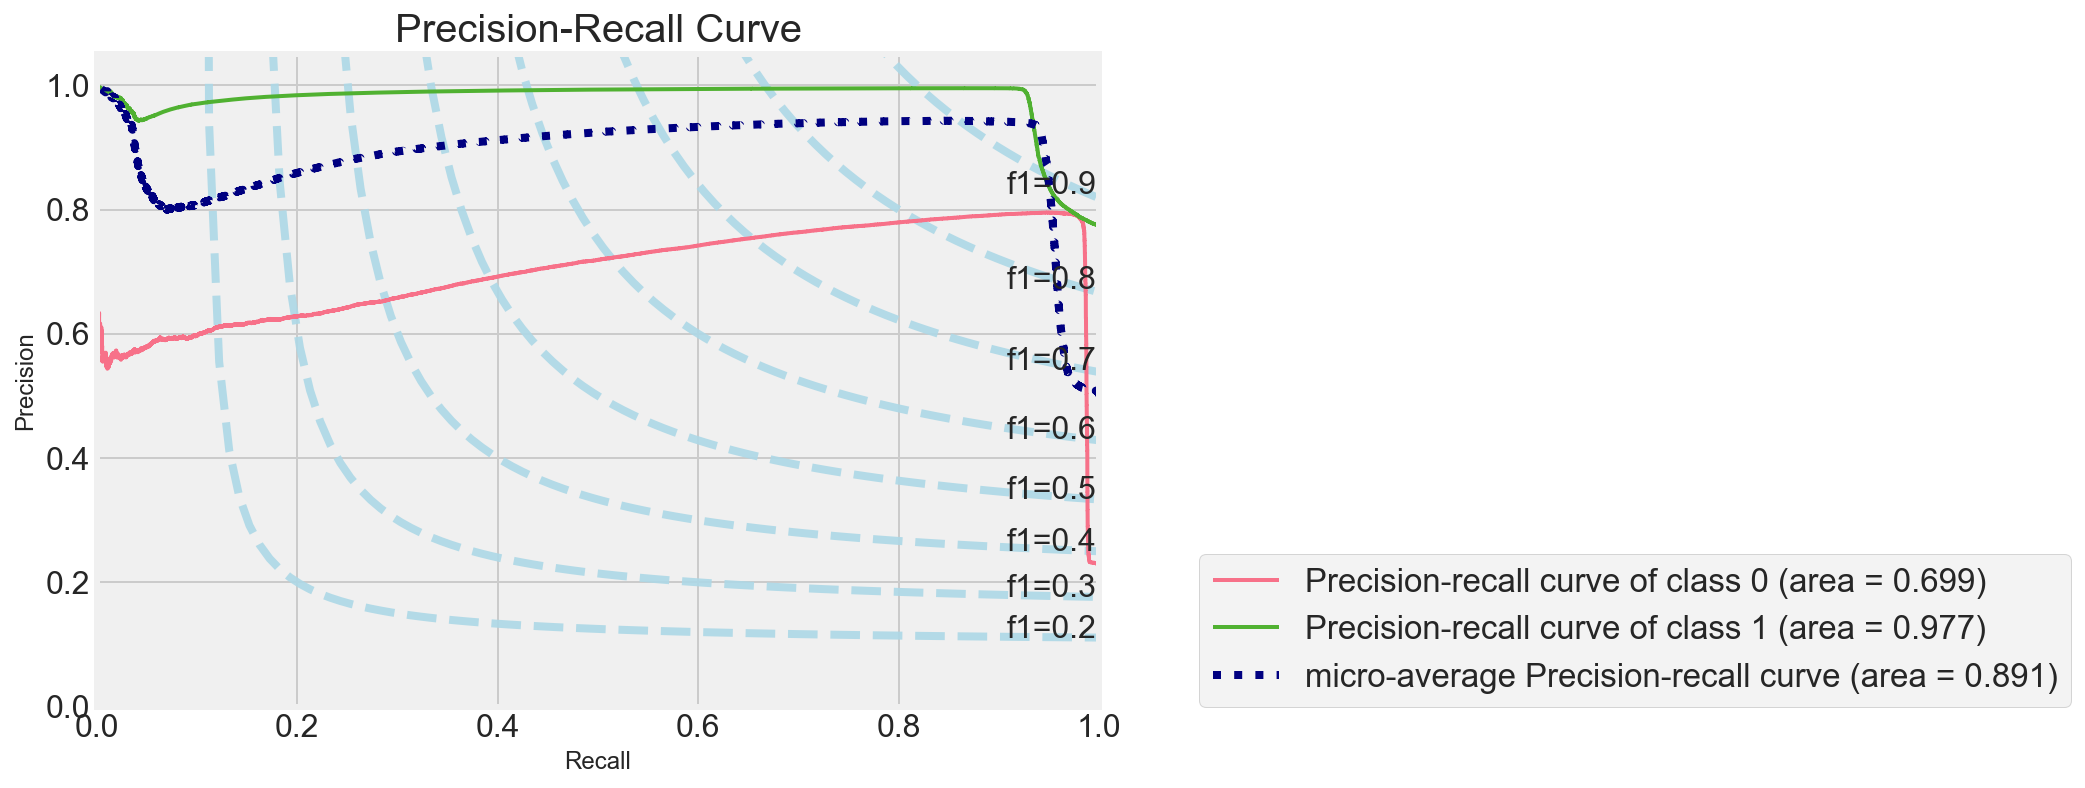

In [25]:
# plot_f1_lines # already defined

# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_LRBase_poly, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

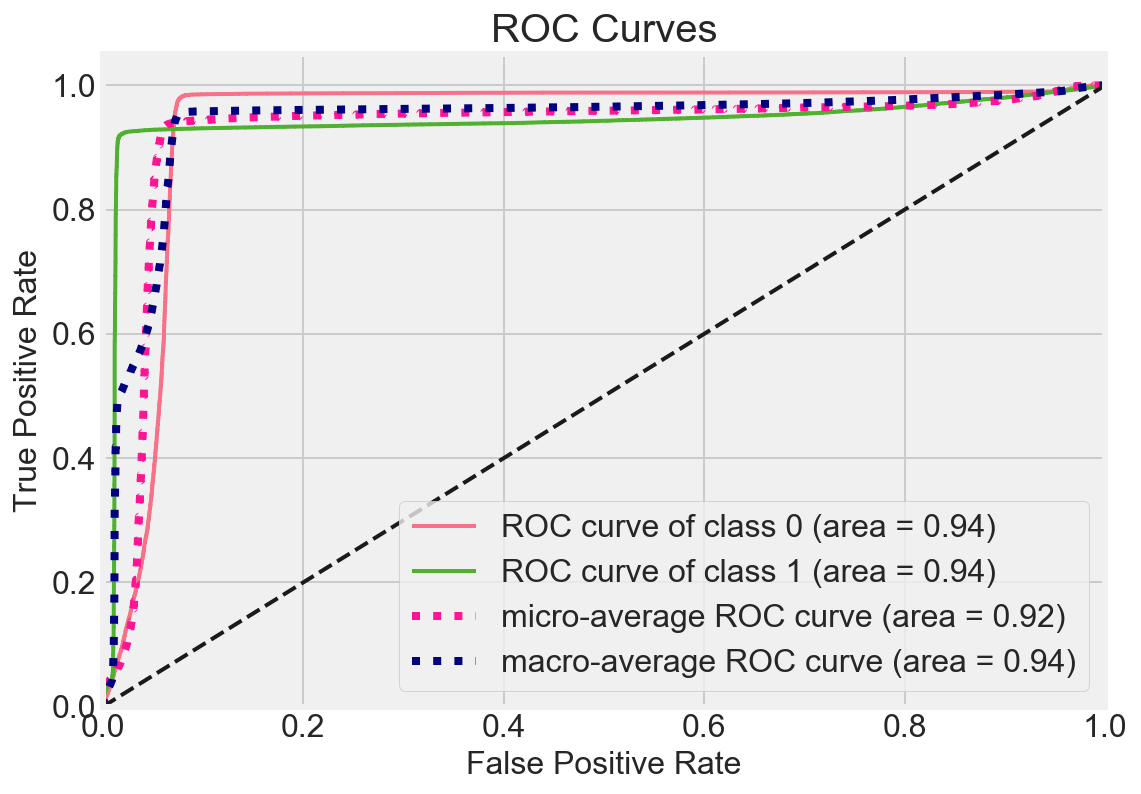

In [26]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_LRBase_poly, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

In [29]:
# Saving polynomial logistic regreesion model 

joblib.dump(modelLR_polynomial, 'modelLR_polynomial_base.jlib')

['modelLR_polynomial_base.jlib']

### Ploynomial Logistic Regression GridSearch

In [60]:
from sklearn.utils.class_weight import compute_class_weight

gs_lr_params = {'penalty': ['l1', 'l2'],# 'elasticnet'],
                'solver': ['liblinear', 'saga'],
                'C': np.logspace(-3, 4, 2),  #np.logspace(-3, 0, 100)}  
                #'class_weight':['balanced'] # already balanced with SMOTE
               }

model_LR_poly_GS = LogisticRegression(solver='liblinear', multi_class='ovr')

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

lr_gridsearch = GridSearchCV(estimator=model_LR_poly_GS,
                             param_grid=gs_lr_params,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=-1,     
                             verbose=1,
                             refit=True)

In [61]:
lr_gridsearch.fit(X_train_poly, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed: 31.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             n_jobs=3,
             param_grid={'C': array([1.e-03, 1.e+04]),
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [62]:
print('Best Paramaters (logistic Regression): ', lr_gridsearch.best_params_)
print('Best Score (logistic Regression): ', lr_gridsearch.best_score_)
print('Best Logistic Regression: ' , lr_gridsearch.best_estimator_)

Best Paramaters (logistic Regression):  {'C': 10000.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best Score (logistic Regression):  0.9352128042839641
Best Logistic Regression:  LogisticRegression(C=10000.0, class_weight='balanced', multi_class='ovr',
                   solver='liblinear')


In [63]:
test_score_LR_polynomial_GS = lr_gridsearch.score(X_test_poly, y_test) 

print("Polynomial LogisticRegression GS Score (Test): ", test_score_LR_polynomial_GS)

Polynomial LogisticRegression GS Score (Test):  0.9351449828726027


In [64]:
joblib.dump(lr_gridsearch, 'lr_gridsearch.jlib')

['lr_gridsearch.jlib']

## Random Forest

#### Random Forest Base Model

In [31]:
modelRF_base = RandomForestClassifier() 
modelRF_base.fit(X_train_pca,y_train)

RandomForestClassifier()

In [32]:
train_score_RF_base = modelRF_base.score(X_train_pca, y_train)
trainCV_score_RF_base = cross_val_score(modelRF_base, X_train_pca, y_train, cv =5).mean()
test_score_RF_base = modelRF_base.score(X_test_pca, y_test)

print("Random Forest Base Score(Train): ", train_score_RF_base)
print("Random Forest Base Cross Val Score (Train): ", trainCV_score_RF_base) 
print("Random Forest Base Score (Test): ", test_score_RF_base)

Random Forest Base Score(Train):  0.9999982377923062
Random Forest Base Cross Val Score (Train):  0.9638042539693729
Random Forest Base Score (Test):  0.9419523051076735


In [33]:
joblib.dump(modelRF_base, 'modelRF_base.jlib')

['modelRF_base.jlib']

In [ ]:
''' # when ran withoOUT vectorizer - RF (but WITH gini and 100 estimators)

Score(Train):  1.0
Cross Val Score (Train):  0.9432718529372724
Score (Test):  0.9421599441243234
    
# when ran withoOUT vectorizer - RF (but WITHout gini and 100 estimators)

Score(Train):  0.9972236010276494  (28 PCA)
Cross Val Score (Train):  0.9416274400747433
Score (Test):  0.9416141208299696
    
# when ran WITH vectorizer - RF  (but without gini and 100 estimators)

Score(Train):  0.9970763264259727
Cross Val Score (Train):  0.8548963139654087
Score (Test):  0.858278969301595
    
# when ran WITH vectorizer - RF  (but WITH gini and 100 estimators)

Score(Train):  1
Cross Val Score (Train):  
Score (Test): 
'''

### Random Forest Grid Search

In [8]:
param_grid_RF = { 
                    'n_estimators': [10, 50, 100],  #, 200
                    'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4, 10, None],  #  20,
                    'criterion' :['gini', 'entropy']
                   # 'class_weight':['balanced']  # SMOTE done
                }

In [9]:
modelRF_ = RandomForestClassifier(random_state=1) 

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

modelRF_GS = GridSearchCV(estimator=modelRF_,
                          param_grid=param_grid_RF, 
                          cv=kf, 
                          scoring='accuracy',
                          n_jobs=-1,     
                          verbose=1,
                          refit=True
                         )

modelRF_GS.fit(X_train_pca, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 134.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 198.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [10]:
print("Best score (Random Forest GS): ", modelRF_GS.best_score_)
print("Best params (Random Forest GS): ", modelRF_GS.best_params_)
print("Best estimator (Random Forest GS): ", modelRF_GS.best_estimator_)

Best score (Random Forest GS):  0.9638588824078805
Best params (Random Forest GS):  {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
Best estimator (Random Forest GS):  RandomForestClassifier(random_state=1)


In [11]:
test_score_RF_GS = modelRF_GS.best_estimator_.score(X_test_pca,y_test)

print("Random Forest GS Score (Test): ", test_score_RF_GS)

Random Forest GS Score (Test):  0.9427704928763119


In [12]:
predictions_RF_GS = modelRF_GS.best_estimator_.predict(X_test_pca)
#predictions_RF_GS

probabilities_RF_GS = modelRF_GS.best_estimator_.predict_proba(X_test_pca)
#probabilities_RF_GS

In [13]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_RF_GS, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

,Predicted_No_Readmissions,Predicted_Readmissions
True_No_Readmissions,19658,1074
True_Readmissions,4172,66762


In [14]:
print(classification_report(y_test, predictions_RF_GS))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     20732
           1       0.98      0.94      0.96     70934

    accuracy                           0.94     91666
   macro avg       0.90      0.94      0.92     91666
weighted avg       0.95      0.94      0.94     91666



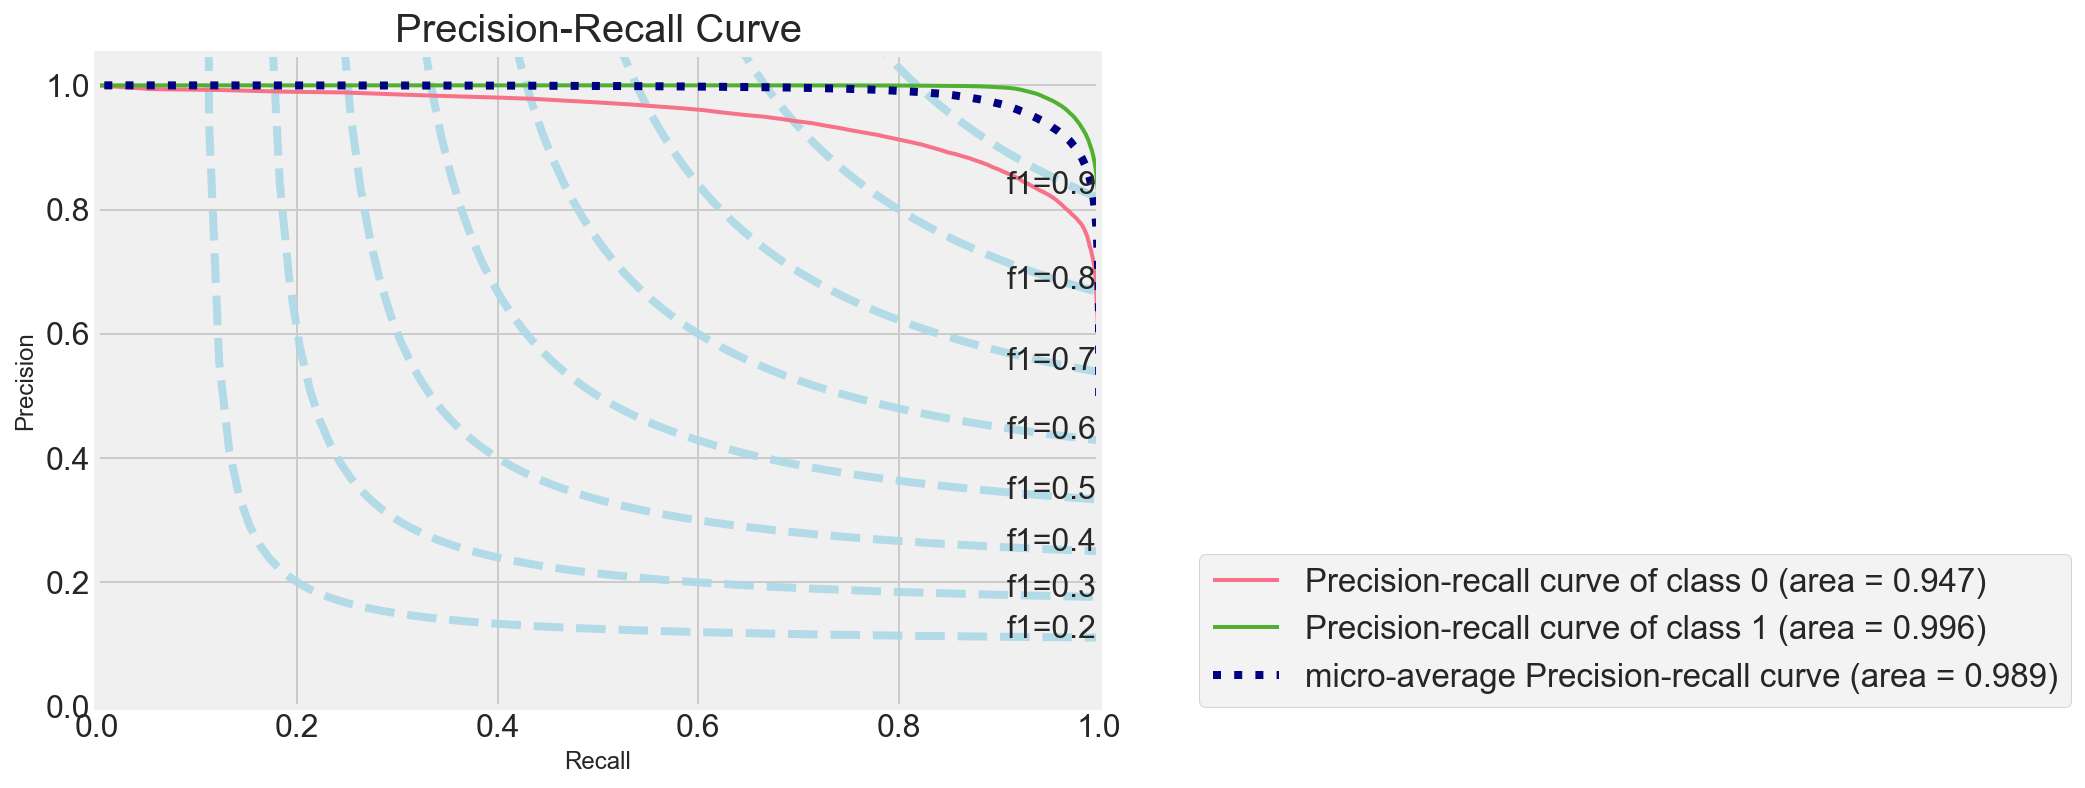

In [17]:
# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_RF_GS, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

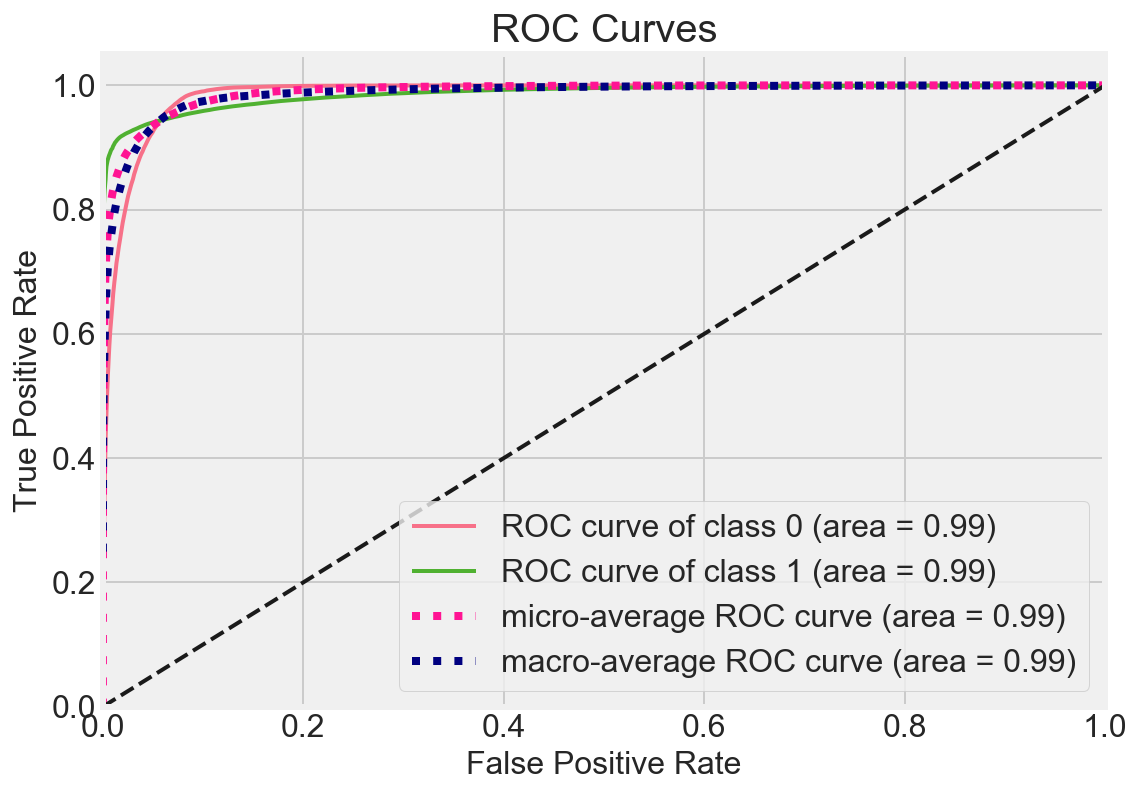

In [18]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_RF_GS, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

In [19]:
joblib.dump(modelRF_GS, 'modelRF_GS.jlib')

['modelRF_GS.jlib']

### Decison Tree

#### Decision Tree - Base model

In [34]:
# DT Base model

modelDT_base = DecisionTreeRegressor()                     #criterion='mse',  max_depth=None, random_state=1
modelDT_base.fit(X_train_pca, y_train)

DecisionTreeRegressor()

In [35]:
train_score_DT_base = modelDT_base.score(X_train_pca, y_train)
trainCV_score_DT_base = cross_val_score(modelDT_base, X_train_pca, y_train, cv =5).mean()
test_score_DT_base = modelDT_base.score(X_test_pca, y_test)

print("Decision Tree Base Score(Train): ", train_score_DT_base)
print("Decision Tree Base Cross Val Score (Train): ", trainCV_score_DT_base) 
print("Decision Tree Base Score (Test): ", test_score_DT_base)

Decision Tree Base Score(Train):  1.0
Decision Tree Base Cross Val Score (Train):  0.5318378718482413
Decision Tree Base Score (Test):  0.6243236797866645


In [36]:
joblib.dump(modelDT_base, 'modelDT_base.jlib')

['modelDT_base.jlib']

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


# initialize the output file object
dot_data = StringIO()

modelDT_base.max_depth

In [ ]:
# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix


def plot_dt(dt, feature_names=None):
    print('Max depth:', dt.max_depth)
    dot_data = StringIO()
    export_graphviz(dt,
                    out_file=dot_data,
                    filled=True,
                    rounded=True,
                    special_characters=True,
                    feature_names=feature_names
                    )

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [ ]:
plot_dt(modelDT_base, feature_names=X_train_pca.columns)

#### Decision Tree - GridSearch

In [39]:
DT_Classifier_params = {'max_depth': [None, 1,3],                              #list(range(1, 4))+[None], #'max_depth': [None, 1,2,3,4,5],#list(range(1, 11))
                        'criterion' :['gini', 'entropy'], 
                        'max_features': [None, 1, 2, 3],
                        'min_samples_split': [2,  10],                         #, 25, 50], #[2, 5, 10, 20, 30, 50],
                        'min_samples_leaf': [1, 4],                             # [1, 2, 3, 4]
                        #'class_weight':['balanced']   # already done SMOTE    #,'ccp_alpha': [0, 0.001, 0.005, 0.01]
                       }

classifier = DecisionTreeClassifier(random_state=1)

In [40]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

DT_Classifier_gridsearch = GridSearchCV(estimator=classifier,
                                         param_grid=DT_Classifier_params,
                                         cv=kf,
                                         scoring='accuracy',
                                         n_jobs=-1,     
                                         verbose=1, 
                                         refit=True
                                       )

DT_Classifier_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 3],
                         'max_features': [None, 1, 2, 3],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10]},
             scoring='accuracy', verbose=1)

In [41]:
print("Best score (Decision Tree GS): ", DT_Classifier_gridsearch.best_score_)
print("Best params (Decision Tree GS): ", DT_Classifier_gridsearch.best_params_)
print("Best estimator (Decision Tree GS): ", DT_Classifier_gridsearch.best_estimator_)

Best score (Decision Tree GS):  0.949535658272684
Best params (Decision Tree GS):  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator (Decision Tree GS):  DecisionTreeClassifier(criterion='entropy', random_state=1)


In [42]:
test_score_DT_GS = DT_Classifier_gridsearch.best_estimator_.score(X_test_pca,y_test)

print('Decision Tree GS Score (Test): ', test_score_DT_GS)

Decision Tree GS Score (Test):  0.9361486265354657


In [43]:
# Predictons and Probabilities 
predictions_DT = DT_Classifier_gridsearch.best_estimator_.predict(X_test_pca) 
#predictions_DT 
probabilities_DT = DT_Classifier_gridsearch.best_estimator_.predict_proba(X_test_pca) 
#probabilities_DT

In [44]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_DT, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])


,Predicted_No_Readmissions,Predicted_Readmissions
True_No_Readmissions,18653,2079
True_Readmissions,3774,67160


In [45]:
print(classification_report(y_test, predictions_DT))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     20732
           1       0.97      0.95      0.96     70934

    accuracy                           0.94     91666
   macro avg       0.90      0.92      0.91     91666
weighted avg       0.94      0.94      0.94     91666



In [46]:
joblib.dump(DT_Classifier_gridsearch, 'DT_Classifier_gridsearch.jlib')

['DT_Classifier_gridsearch.jlib']

### KNN 

#### Base model KNN

In [20]:
# Base model KNN
modelknn_base = KNeighborsClassifier()                                                                # n_neighbors=5
modelknn_base.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [21]:
X_train_pca.shape, y_train.shape, X_test_pca.shape, y_test.shape

((567470, 28), (567470, 1), (91666, 28), (91666, 1))

In [22]:
train_score_KNN_base = modelknn_base.score(X_train_pca, y_train)
trainCV_score_KNN_base = cross_val_score(modelknn_base, X_train_pca, y_train, cv =5).mean()
test_score_KNN_base = modelknn_base.score(X_test_pca, y_test)

print("KNN Base Score(Train): ", train_score_KNN_base)
print("KNN Base Cross Val Score (Train): ", trainCV_score_KNN_base) 
print("KNN Base Score (Test): ", test_score_KNN_base)

KNN Base Score(Train):  0.9382962976016354
KNN Base Cross Val Score (Train):  0.9073942234831798
KNN Base Score (Test):  0.841369755416403


In [23]:
joblib.dump(modelknn_base, 'modelknn_base.jlib')

['modelknn_base.jlib']

#### KNN GridSearch

In [94]:
gs_knn_params = {
                'n_neighbors': [5, 10],                                    #  25, 50], #[5, 15, 25, 35, 40, 45, 50, 60, 75],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
                }

model_KNN = KNeighborsClassifier()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
knn_gridsearch = GridSearchCV(estimator=model_KNN,
                             param_grid=gs_knn_params,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=-1,                                      # runs on 3 cores
                             verbose=1)                                      # return_train_score=True
knn_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
datetime.now()

In [ ]:
# Printing parameters

print('Best Paramaters (KNN): ', knn_gridsearch.best_params_)
print('Best Score (KNN): ', knn_gridsearch.best_score_)
print('Best KNN ' , knn_gridsearch.best_estimator_)

In [ ]:
datetime.now()

In [ ]:
print('Test Score: ', knn_gridsearch.best_estimator_.score(X_test_pca,y_test))

In [ ]:
datetime.now()

In [ ]:
predictions_KNN = knn_gridsearch.best_estimator_.predict(X_test_pca)
#predictions_KNN

probabilities_KNN = knn_gridsearch.best_estimator_.predict_proba(X_test_pca)
#probabilities_KNN

In [ ]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_KNN, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

In [ ]:
print(classification_report(y_test, predictions_KNN))

In [ ]:
datetime.now()

In [ ]:
joblib.dump(knn_gridsearch, 'knn_gridsearch.jlib')

### SVM

In [ ]:
datetime.now()  

In [26]:
# Base model  # took 1hr 30 mins to initialize the object in AWS

modelSVM = SVC()
modelSVM.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
datetime.now()

datetime.datetime(2020, 5, 14, 11, 49, 3, 165596)

In [ ]:
print("Score(Train): ", modelSVM.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelSVM, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelSVM.score(X_test_pca, y_test))

Score(Train):  0.9518548417888955


In [ ]:
datetime.now() # takes over 5 hrs 0 mins in AWS

In [62]:
joblib.dump(modelSVM, 'modelSVM_base.jlib')

['modelSVM_base.jlib']

In [133]:

gs_SVM_params = {'gamma': np.linspace(0.01, 2, 2),  #np.linspace(0.01, 2, 10),
                'kernel': ['rbf'],#,'linear', 'poly'],#, 'rbf', 'sigmoid'],  # , 'precomputed'
                'C': np.logspace(-2, 2, 2)}   

modelSVM_GS = SVC()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

SVM_gridsearch = GridSearchCV(estimator=modelSVM_GS,
                             param_grid=gs_SVM_params,
                             cv=kf,
                             #scoring='accuracy',
                             n_jobs=3,     # runs on 3 cores
                             verbose=1,
                             error_score = 0.0)


SVM_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


KeyboardInterrupt: 

In [ ]:
datetime.now()

In [ ]:
print('Best Paramaters (SVM): ', SVM_gridsearch.best_params_)
print('Best Score (SVM): ', SVM_gridsearch.best_score_)
print('Best SVM: ' , SVM_gridsearch.best_estimator_)

In [ ]:
datetime.now()

In [ ]:
print('Test Score: ' , SVM_gridsearch.best_estimator_.score(X_test_pca,y_test))

In [ ]:
datetime.now()

In [ ]:
def grid_search_func(estimator, params, X_train, y_train, X_test, y_test, scoring_function=metrics.accuracy_score, scoring='accuracy', cv=5):
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=params,
        return_train_score=True,
        scoring=scoring,
        cv=cv)

    gs.fit(X_train, y_train)
    datetime.now()
    
    print("Best score")
    print(gs.best_score_)
    print()
    print("Best estimator")
    print(gs.best_estimator_.get_params())
    print()
    datetime.now()

    predictions = gs.best_estimator_.predict(X_test)
    print('Test score: ', scoring_function(y_test, predictions))
    print()
    print_cm_cr(y_test, predictions)
    datetime.now()
    
    return gs

In [ ]:
params_rbf = {'C': np.logspace(-2, 2, 11),
              'gamma': np.linspace(0.01, 2, 10)}

gs_rbf = grid_search_func(model_rbf, params_rbf,
                          X_train, y_train, X_test, y_test)

In [25]:
datetime.now()

datetime.datetime(2020, 5, 16, 23, 35, 51, 220753)

In [ ]:
# Write function for diff models and grid search pipeline
try with and without over sampling
LR,
KNN,
DT,
RF
SVM
AdaBoost?
change threshold of probability and see if the accuracy gets better
is recall or precision more imp for me 

death prediction
cost prediction
disease prediction

d0 ensembling ??

In [ ]:
#week 5 day 1

pipe = Pipeline(steps=[('scaler', scaler),
                       ('model', model)])

pipe.fit(X, y)

columns_to_drop = ['PassengerId', 'Name']
columns_to_dummify = ['Sex', 'Pclass', 'Embarked']

tprep = TitanticPreprocessor(columns_to_drop=columns_to_drop,
                             columns_to_dummify=columns_to_dummify)
scaler = StandardScaler()
model = LogisticRegression(solver='lbfgs', random_state=1)

pipe = Pipeline(steps=[('titanic_prep', tprep),
                       ('scaler', scaler),
                       ('model', model)
                      ]
               )


scaler = StandardScaler()
#scaler = MinMaxScaler()
poly = PolynomialFeatures(include_bias=False)
model = LogisticRegression(solver='lbfgs')
#model = KNeighborsClassifier()
fu_pipe = Pipeline(steps=(('union', fu),
                          ('poly', poly),
                          ('scaler', scaler),
                          ('model', model)))

In [ ]:
# setup the grid search

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

In [ ]:
refer this - https://towardsdatascience.com/imbalanced-class-sizes-and-classification-models-a-cautionary-tale-part-2-cf371500d1b3
    
    
    
    models = [{'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=88),
           'grid': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}},
          
          {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier(),
           'grid': {"n_neighbors":np.arange(8)+1}},
          
          {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=88),
           'grid': {"max_depth":np.arange(8)+1}},
          
          {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=88),
           'grid': {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}},
          
          {'name': 'svm_rbf', 'label': 'SVC (RBF)',
           'classifier':SVC(random_state=88),
           'grid': {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}}]

In [ ]:
# Can I find imp features (rev engg PCAs to real feature) - https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a

In [ ]:
# Can i do deeper analytics to find which diseases are mostly like for readmssion or mots/leat expenseive so that we 

# can target the low hanging fruits

In [ ]:
# Can i look at probablities and figure out the index and relate to the patient

In [24]:
#X_train_pca.head(2)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28
0,4.939000,-2.285240,-0.226003,-0.893238,0.570906,-1.876132,-0.198704,-1.056337,0.122633,0.138341,0.081095,0.747890,0.276735,0.395943,-1.814234,0.190413,-0.075387,0.126942,1.366568,-2.073680,-1.007254,1.740771,0.776393,-1.421639,1.309997,-1.467296,-1.357262,-1.080451
1,-2.211324,0.625913,-0.191265,2.004928,0.813503,-0.490319,-0.483132,-0.333660,0.202782,-1.337767,0.115447,0.188925,-0.142400,0.039871,0.190795,-0.014646,0.225228,0.100106,0.124809,0.011146,-0.195059,-0.024842,-0.588223,-0.124320,0.526355,0.204535,-0.387743,0.836611


In [ ]:
final2008_2009DF_selectedFeatures['READMIT7'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT30'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT60'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT90'].unique()

In [ ]:
# do oversample for eda

# Class count
count_class_0, count_class_1 = final2008_2009DF_selectedFeatures['DEAD'].value_counts() #READMIT7_FLAG
count_class_0, count_class_1

In [ ]:
# Divide by class
df_class_0 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 0]   
df_class_1 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 1]
print(df_class_0.shape)
print(df_class_1.shape)

In [ ]:
# Oversampling class 1

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
final2008_2009DF_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(final2008_2009DF_over.shape)
final2008_2009DF_over.head()